In [7]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
%matplotlib inline

#COSE DEL DATAFRAME
df = pd.read_csv("../DatasetClientClustering.csv", 
                 engine='c', 
                 sep=',', 
                 encoding='latin-1')
df = df.drop(df.columns[list(np.arange(8))], axis=1)
df = df.drop(columns=["ClientID"])


current_investment = ["PortfolioRisk", "PortfolioHorizon", "AuM", "BondInvestments", "EquityInvestments",
                     "MoneyMarketInvestments", "OtherInvestments", "Cash"]
person_var = ["RiskPropension", "ClientInvestmentHorizon", "ClientKnowledgeExperience", "ClientPotentialIndex",
             "IncomeHighLow", "Sex", "Age", "IncomeNeed", "LongTermCareNeed", "ProtectionNeed",
             "InheritanceIndex", "PanicMood", "ClientDateStart", "NoTrustInBanks"]

(array([  6.,  27.,  74., 159., 293., 420., 407., 322., 155.,  86.,  49.,
         66., 137., 216., 271., 290., 265., 130.,  64.,  40.,  58., 128.,
        227., 272., 323., 244., 167.,  68.,  28.,   8.]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333, 0.36666667, 0.4       , 0.43333333, 0.46666667,
        0.5       , 0.53333333, 0.56666667, 0.6       , 0.63333333,
        0.66666667, 0.7       , 0.73333333, 0.76666667, 0.8       ,
        0.83333333, 0.86666667, 0.9       , 0.93333333, 0.96666667,
        1.        ]),
 <a list of 30 Patch objects>)

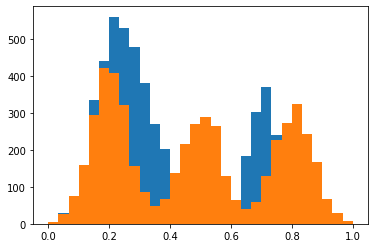

In [8]:
from sklearn import cluster as cster
plt.hist(df["ProtectionNeed"], bins = 30)
plt.hist(df["LongTermCareNeed"], bins = 30)

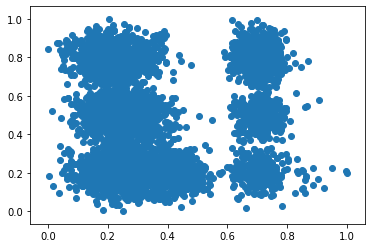

In [9]:
plt.scatter(x = df["ProtectionNeed"], y = df["LongTermCareNeed"])

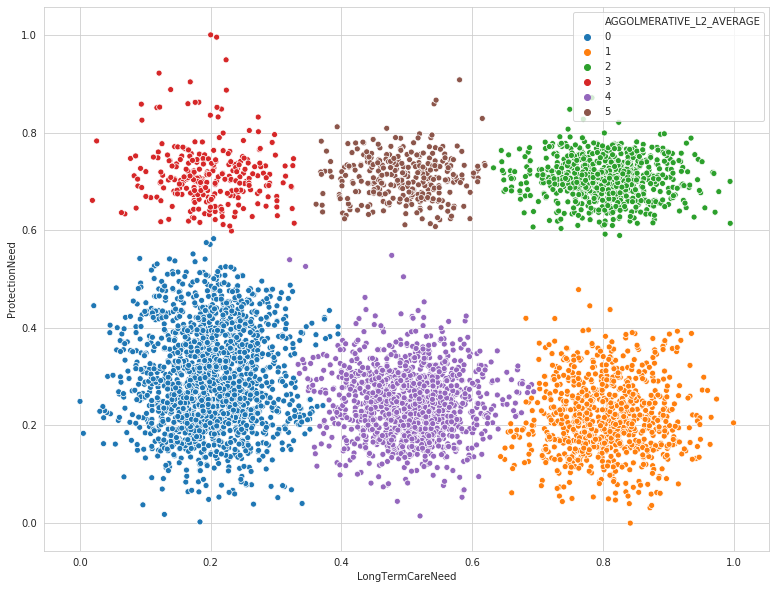

In [18]:
df_bi = df[["ProtectionNeed", "LongTermCareNeed"]] 
dbscan = cster.DBSCAN()
bi_cluster = dbscan.fit_predict(df_bi)
df_bi["DBSCAN_DEFAULT"] = bi_cluster
#very bad

kmeans = cster.AgglomerativeClustering(n_clusters = 6, affinity = "l2", linkage = "average")
bi_cluster = kmeans.fit_predict(X = df_bi)
df_bi["AGGOLMERATIVE_L2_AVERAGE"] = bi_cluster

#SETTO I COSI DI SEABORN
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig = fig.set_size_inches(13, 10)
sns.scatterplot(y = "ProtectionNeed", 
                x = "LongTermCareNeed", 
                hue = "AGGOLMERATIVE_L2_AVERAGE",
                data = df_bi, 
                palette = sns.color_palette(n_colors = 6))
#carino chico

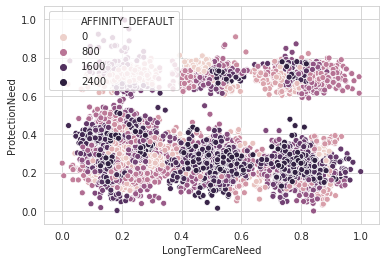

In [11]:
#SUCKS
affprog = cster.AffinityPropagation()
bi_cluster = affprog.fit_predict(X = df_bi[["LongTermCareNeed", "ProtectionNeed"]])
df_bi["AFFINITY_DEFAULT"] = bi_cluster

sns.scatterplot(y = "ProtectionNeed", 
                x = "LongTermCareNeed", 
                hue = "AFFINITY_DEFAULT",
                data = df_bi)

In [ ]:
#SUCKS
meanShift = cster.MeanShift()
bi_cluster = meanShift.fit_predict(X = df_bi[["LongTermCareNeed", "ProtectionNeed"]])
df_bi["MEANSHIFT_DEFAULT"] = bi_cluster

sns.scatterplot(y = "ProtectionNeed", 
                x = "LongTermCareNeed", 
                hue = "MEANSHIFT_DEFAULT",
                data = df_bi)

# Ora si comincia dall'analisi dell'algoritmo agglomerativo per aggiungere nuove variabili

In [23]:
#aggiungo al dataset totale l'informazione riguardante il numero di clusters 
#ottenuta con cluster di tipo agglomerativo
df_bi = df[["ProtectionNeed", "LongTermCareNeed"]] 
agglo = cster.AgglomerativeClustering(n_clusters = 6, affinity = "l2", linkage = "average")
bi_cluster = agglo.fit_predict(X = df_bi)
df["AGGOLMERATIVE_L2_AVERAGE"] = bi_cluster

RiskPropension  PortfolioRisk  ClientInvestmentHorizon  \
0           0.597553       0.087787                20.778831   
1           0.501486       0.062290                15.228477   
2           0.554108       0.000000                 9.675789   
3           0.440729       0.032341                 9.563829   
4           0.540528       0.037852                17.941533   
...              ...            ...                      ...   
4995        0.417480       0.061442                39.616461   
4996        0.594193       0.023741                12.897960   
4997        0.577775       0.000000                15.481864   
4998        0.402162       0.014505                 7.220000   
4999        0.685539       0.082367                 8.451458   

      PortfolioHorizon  ClientKnowledgeExperience  ClientPotentialIndex  \
0               3.7027                   0.285714              0.148466   
1               2.7327                   0.714286              0.152761   
2               0.5000                   0.523810              0.243558   
3               2.5676                   0.619048              0.089571   
4               2.4911                   0.428571              0.162577   
...                ...                        ...                   ...   
4995            3.4684                   0.619048              0.174847   
4996            1.0325                   0.809524              0.292025   
4997            0.5000                   0.523810              0.096933   
4998            1.7193                   0.523810              0.142945   
4999            3.5968                   0.523810              0.150920   

      IncomeHighLow  Sex      AuM  Age  ...  PanicMood  ClientDateStart  \
0                 0    1    13719   22  ...          0             2015   
1                 0    1    45973   61  ...          0             2016   
2                 0    0    10233   24  ...          0             2015   
3                 0    0    25144   46  ...          0             2015   
4                 0    0   222892   57  ...          0             2015   
...             ...  ...      ...  ...  ...        ...              ...   
4995              0    0    26348   52  ...          0             2006   
4996              0    1  1002570   45  ...          0             2016   
4997              0    1    31032   43  ...          0             2016   
4998              0    0    50243   65  ...          0             2015   
4999              0    1    50743   21  ...          0             2016   

      NoTrustInBanks  Prov  BondInvestments  EquityInvestments  \
0                  0    PA           0.5730             0.4270   
1                  0    RM           0.5341             0.4466   
2                  0    BS           0.0000             0.0000   
3                  0    RE           0.6428             0.1220   
4                  0    MI           0.1707             0.2701   
...              ...   ...              ...                ...   
4995               0    CO           0.3792             0.4520   
4996               1    FI           0.9012             0.0283   
4997               0    PU           0.0000             0.0000   
4998               0    SA           0.6541             0.1626   
4999               0    BI           0.4010             0.4600   

      MoneyMarketInvestments  OtherInvestments    Cash  \
0                     0.0000            0.0000  0.0000   
1                     0.0124            0.0000  0.0070   
2                     0.0000            0.0000  1.0000   
3                     0.0407            0.1943  0.0002   
4                     0.5332            0.0045  0.0215   
...                      ...               ...     ...   
4995                  0.0671            0.0830  0.0187   
4996                  0.0197            0.0495  0.0012   
4997                  0.0000            0.0000  1.0000   
4998                  0.1635            0.0000  0.0198   
4999

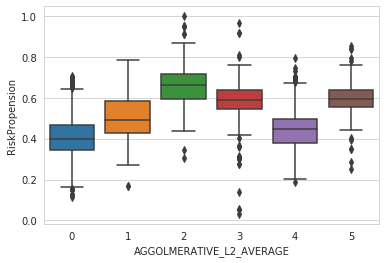

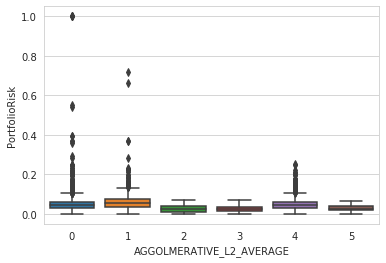

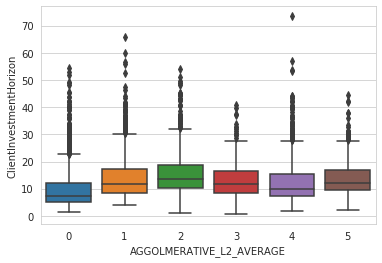

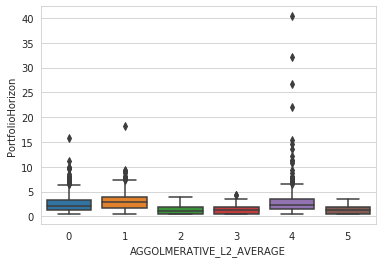

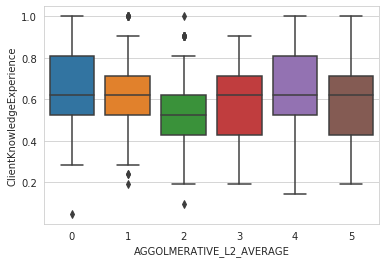

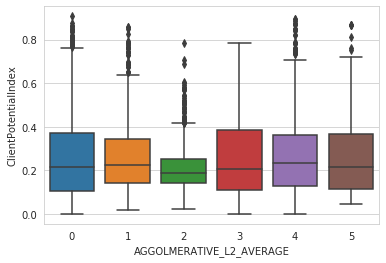

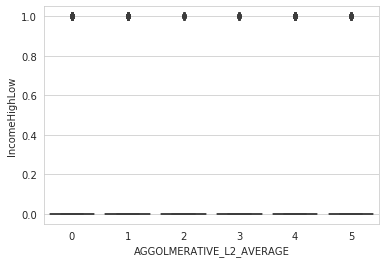

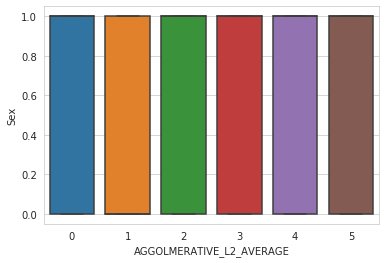

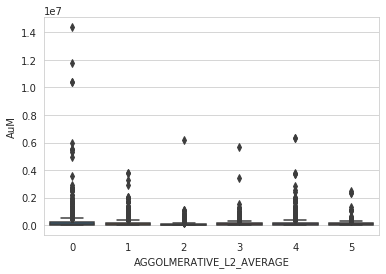

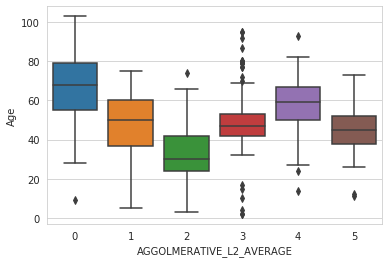

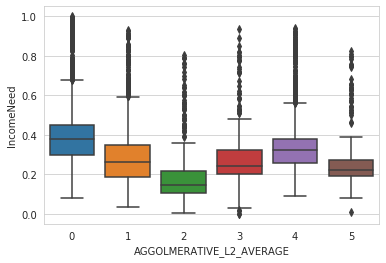

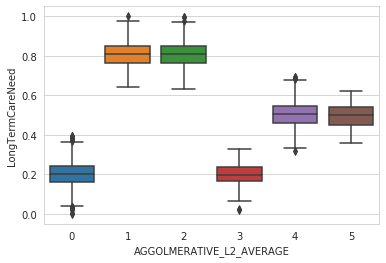

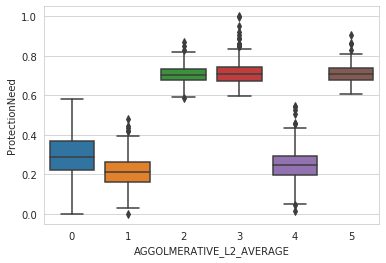

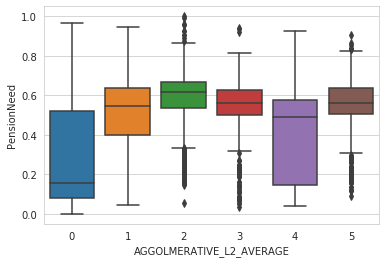

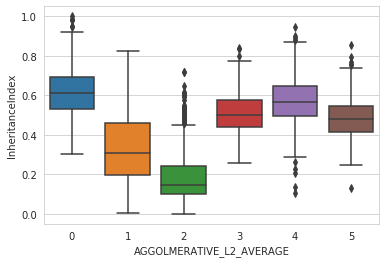

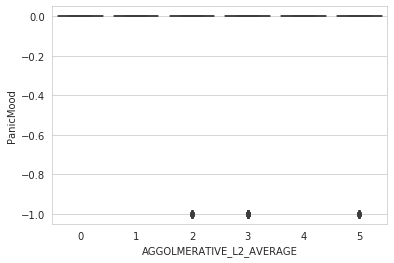

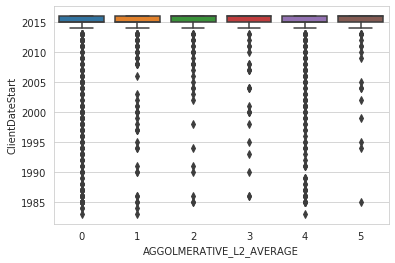

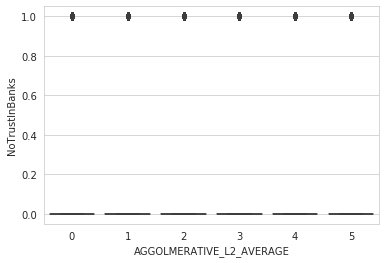

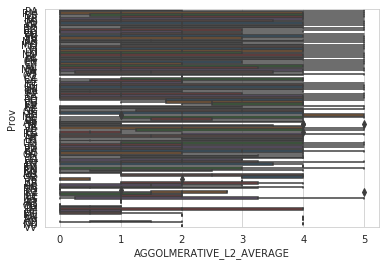

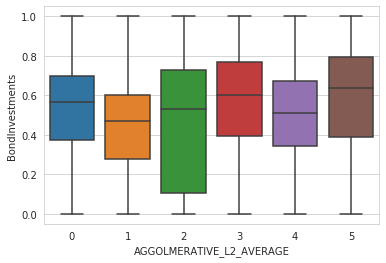

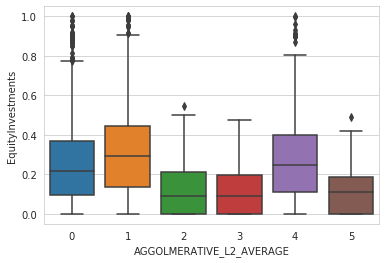

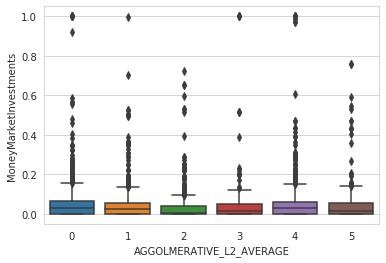

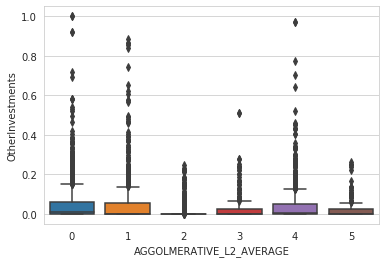

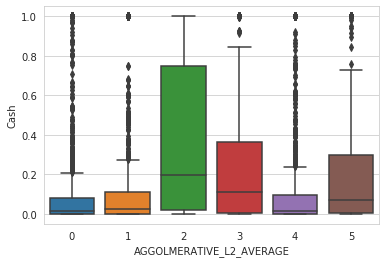

In [42]:
#analizzo tutte le variabili all'interno di ogni cluster
for variable in df.columns[:-1]:
    sns.boxplot(y = variable, 
                x = "AGGOLMERATIVE_L2_AVERAGE", 
                palette = sns.color_palette(n_colors = 6), 
                data = df)
    plt.show()


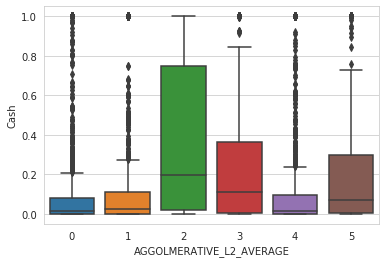

In [41]:
#provo con inheritance index
import plotly.express as px
